In [1]:
""" import packages """
import MDAnalysis as mda 
import numpy as np
import os 
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import numpy as np
import matplotlib.pyplot as plt
import nglview as ngl
from MDAnalysis.analysis.rdf import InterRDF


In [2]:
# import the trajectory and the structure from pdb files and dcd files, need to add u.atoms.names=u.atoms.types for type selection seen below
u = mda.Universe('molecule1/pdb import files/output_labeled.pdb', 'molecule1/dcd files/trajectory_prodholdtrp1_dcd.dcd', guess_bonds = True)
u2 = mda.Universe('molecule2/pdb import files/output_labeled.pdb', 'molecule2/dcd files/trajectory_prodhold2trp1_dcd.dcd', guess_bonds= True)
u.atoms.names=u.atoms.types
u2.atoms.names=u2.atoms.types

/Users/darv/micromamba/envs/melanin/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
# will be used later on

# define the atom selection to construct the RDF
sc_o = u.atoms.select_atoms('resname SC1 and type O')
sc_o2 = u.atoms.select_atoms('resname SC2 and type O')
# SC1 and SC2 are the identity of glycolated sidechain 1 and 2 respectively
# add the two to call all sidechain oxygens
allside = sc_o + sc_o2
# repeat for the second molecule
sc_o_2 = u2.atoms.select_atoms('resname SC1 and type O')
sc_o2_2 = u2.atoms.select_atoms('resname SC2 and type O')
allside2 = sc_o_2 + sc_o2_2



In [4]:
# define the atom selection to construct the RDF - molecule 1
side1 = u.select_atoms('id 15:25') + u.select_atoms('id 77:91')
side1oxy = side1.select_atoms('type O')
#ngl.show_mdanalysis(side1oxy) - use as check

In [5]:
# define the atom selection to construct the RDF - molecule 2
side_2 = u2.select_atoms('id 15:40') + u2.select_atoms('id 107:141')
side2oxy = side_2.select_atoms('type O')
#ngl.show_mdanalysis(side2oxy) - use as check

In [6]:
#run all RDF for molecule 1 and molecule 2
rdf_scovsall = InterRDF (side1oxy, allside, nbins = 105, range = (0.0, 15.0), exclusion_block=(2,2))
rdf_scovsall.run()


rdf_scovsall2 = InterRDF (side2oxy, allside2, nbins = 105, range = (0.0, 15.0), exclusion_block=(2,2))
rdf_scovsall2.run()

<>:5: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\A'
/var/folders/nd/kh4yd30d10304m_81k6dg9c80000gn/T/ipykernel_41941/3394757214.py:5: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Radial Distance ($\AA$)', fontsize = 12)


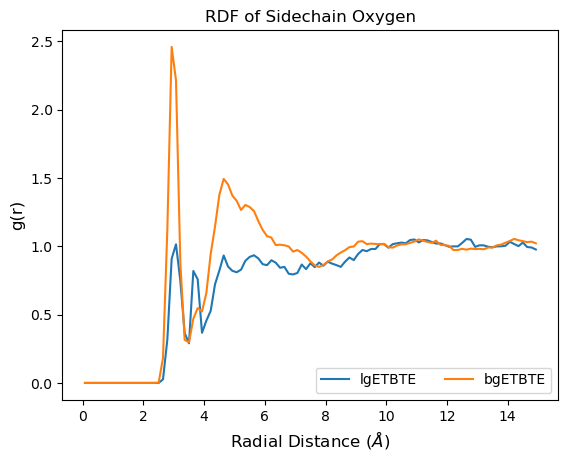

In [13]:
# plot the RDF for molecule 1 and molecule 2 for the sidechain oxygens
plt.plot(rdf_scovsall.results.bins, rdf_scovsall.results.rdf, label = 'lgETBTE')
plt.plot(rdf_scovsall2.results.bins, rdf_scovsall2.results.rdf, label = 'bgETBTE')
plt.title('RDF of Sidechain Oxygen')
plt.grid(False)
plt.xlabel('Radial Distance ($\AA$)', fontsize = 12)
plt.ylabel('g(r)', fontsize = 12)
plt.legend(loc='lower right', fancybox=True, shadow=False, ncol=5)
plt.savefig('rdf_scovsall.png', dpi=600)


In [8]:
# defining the backbone atoms in the molecules
bb = u.atoms.select_atoms('resname BAC and not type H')
bb_2 = u2.atoms.select_atoms('resname BAC and not type H')

backbone = bb.select_atoms('id 0:70 and not id 1 and not id 2 and not id 10 and not id 9 and not id 11 and not id 57 and not id 56 and not id 60 and not id 59') 
backbone2 = bb_2.select_atoms('id 0:191 and not id 10 and not id 9 and not id 2 and not id 1 and not id 90 and not id 89 and not id 87 and not id 86') 
#ngl.show_mdanalysis(backbone2) - use as check

NGLWidget(max_frame=999)

In [9]:
# used this to prevent self inclusion in the RDF
allsidebb = allside.select_atoms('not id 0:121')
# ngl.show_mdanalysis(allsidebb)

NGLWidget(max_frame=999)

<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
/var/folders/nd/kh4yd30d10304m_81k6dg9c80000gn/T/ipykernel_13626/4266070988.py:8: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Radial Distance ($\AA$)', fontsize = 12)


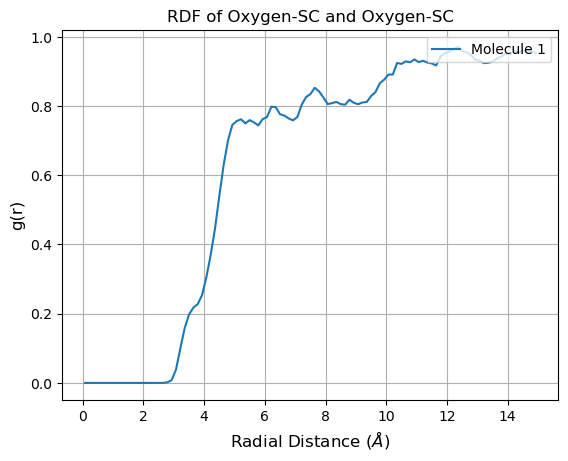

In [10]:
# run RDF of backbone carbon and a sidechain oxygen
rdf_bb_oxy = InterRDF (backbone, allsidebb, nbins = 105, range = (0.0, 15.0))
rdf_bb_oxy.run()
# plot the RDF for molecule 2 for the sidechain oxygens
plt.plot(rdf_bb_oxy.results.bins, rdf_bb_oxy.results.rdf, label = 'Molecule 1')
plt.title('RDF of Oxygen-SC and Oxygen-SC')
plt.grid(True)
plt.xlabel('Radial Distance ($\AA$)', fontsize = 12)
plt.ylabel('g(r)', fontsize = 12)
plt.legend(loc='upper right', fancybox=True, shadow=False, ncol=5)

<>:9: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
/var/folders/nd/kh4yd30d10304m_81k6dg9c80000gn/T/ipykernel_13626/2914157761.py:9: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Radial Distance ($\AA$)', fontsize = 12)


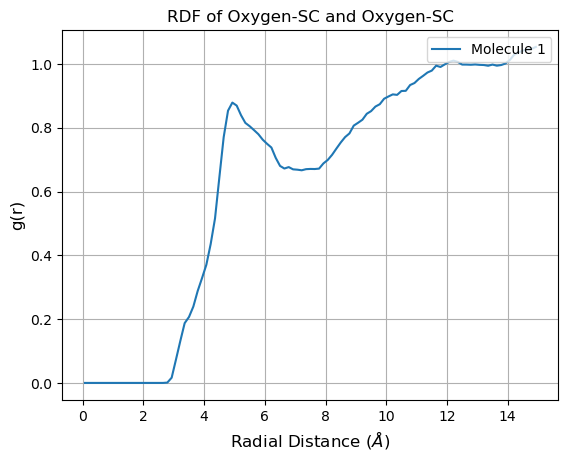

In [11]:
# run RDF of backbone carbon and a sidechain oxygen - molecule 2
allsidebb2 = allside2.select_atoms('not id 0:191')
rdf_bb2_oxy = InterRDF (backbone2, allsidebb2, nbins = 105, range = (0.0, 15.0))
rdf_bb2_oxy.run()
# plot the RDF for molecule 2 for the sidechain oxygens
plt.plot(rdf_bb2_oxy.results.bins, rdf_bb2_oxy.results.rdf, label = 'Molecule 1')
plt.title('RDF of Oxygen-SC and Oxygen-SC')
plt.grid(True)
plt.xlabel('Radial Distance ($\AA$)', fontsize = 12)
plt.ylabel('g(r)', fontsize = 12)
plt.legend(loc='upper right', fancybox=True, shadow=False, ncol=5)

<>:6: SyntaxWarning: invalid escape sequence '\A'
<>:6: SyntaxWarning: invalid escape sequence '\A'
/var/folders/nd/kh4yd30d10304m_81k6dg9c80000gn/T/ipykernel_13626/3617832207.py:6: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Radial Distance ($\AA$)', fontsize = 12)


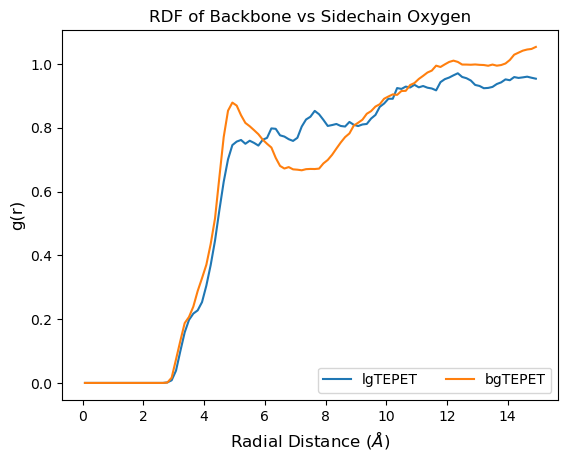

In [12]:
plt.plot(rdf_bb_oxy.results.bins, rdf_bb_oxy.results.rdf, label = 'lgTEPET')
plt.plot(rdf_bb2_oxy.results.bins, rdf_bb2_oxy.results.rdf, label = 'bgTEPET')

plt.title('RDF of Backbone vs Sidechain Oxygen')
plt.grid(False)
plt.xlabel('Radial Distance ($\AA$)', fontsize = 12)
plt.ylabel('g(r)', fontsize = 12)
plt.legend(loc='lower right', fancybox=True, shadow=False, ncol=5)

In [13]:
bb = u.atoms.select_atoms('resname BAC and not type H')
bb_2 = u2.atoms.select_atoms('resname BAC and not type H')

backbone = bb.select_atoms('id 0:121')
backbone2 = bb_2.select_atoms('id 0:191')
backboneuni = u.select_atoms('resname BAC and not type H')
backboneuni2 = u2.select_atoms('resname BAC and not type H')
bbuni_real = backboneuni.select_atoms('not id 0:121')
bbuni_real2 = backboneuni.select_atoms('not id 0:191')
ngl.show_mdanalysis(backboneuni)



NGLWidget(max_frame=999)